---
# Title: NFL Draft and Contract Data - Analysis
# Author: Dominic Quiazon
# Date: 2023-10-10
---

## Table of Contents
#### 1. About the Analysis
#### 2. Task
#### 3. The Data for Analysis
#### 4. Load Packages for Analysis
#### 5. Install and Load Dataset for Analysis
#### 6. Understand the Data
#### 7. Cleaning the Data
#### 8. Analyze the Data
#### 9. Visualize the Data
#### 10. Summary

## About the Analysis
The following analysis reviews all NFL Draft data and Contract Signings of players from the 2000 to 2023 seasons from the dataset created by [Nicholas Liu-Sontag](https://www.kaggle.com/nicholasliusontag), titled [NFL Contract and Draft Data](https://www.kaggle.com/datasets/nicholasliusontag/nfl-contract-and-draft-data). The aim of the analysis is to draw conclusions on whether draft position, year signed, or position played correlates to the total value of the contract each player signed. 

## Task
1. Review the Data
2. Compute Average Total Value of Contracts Per Year
3. Compare Variables to Draw Conclusions 

## The Data for Analysis
As mentioned above, the data was provided by [Nicholas Liu-Sontag](https://www.kaggle.com/nicholasliusontag), titled [NFL Contract and Draft Data](https://www.kaggle.com/datasets/nicholasliusontag/nfl-contract-and-draft-data). This dataset was posted on Kaggle and utilizes the R programming language.

## Load Packages for Analysis

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(janitor)
library(lubridate)
options(scipen = 100, digits = 4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Load Dataset for Analysis
The following function utilizes the readr package to enable the import of the CSV file.

In [2]:
draft_contract_data <- read_csv("/kaggle/input/nfl-contract-draft-data2000-2022/NFL_Contract_Draft_data2000-2022.csv")

Rows: 12629 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): player, team, position, search_key, signing_team
dbl (10): id, draft_year, round, pick, total_games, year_signed, value, valu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Understand the Data

In [3]:
head(draft_contract_data)
colnames(draft_contract_data)
glimpse(draft_contract_data)

id,player,draft_year,round,pick,team,position,total_games,search_key,year_signed,signing_team,value,value_norm,guaranteed_value,gtd_norm
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,Courtney Brown,2000,1,1,CLE,DE,61,"Courtney Brown, DE",2000,Browns,44939436,0.72282,10880250,0.17500
0,Courtney Brown,2000,1,1,CLE,DE,61,"Courtney Brown, DE",2004,Browns,14700000,0.18242,2000000,0.02482
0,Courtney Brown,2000,1,1,CLE,DE,61,"Courtney Brown, DE",2003,Browns,20500000,0.27331,1000000,0.01333
0,Courtney Brown,2000,1,1,CLE,DE,61,"Courtney Brown, DE",2005,Broncos,18800000,0.21988,1260000,0.01474
0,Courtney Brown,2000,1,1,CLE,DE,61,"Courtney Brown, DE",2006,Broncos,5400000,0.05294,1055000,0.01034
12,John Abraham,2000,1,13,NYJ,DE,192,"John Abraham, DE",2006,Jets,8332000,0.08169,8332000,0.08169


[1] "id"               "player"           "draft_year"       "round"           
 [5] "pick"             "team"             "position"         "total_games"     
 [9] "search_key"       "year_signed"      "signing_team"     "value"           
[13] "value_norm"       "guaranteed_value" "gtd_norm"

Rows: 12,629
Columns: 15
$ id               <dbl> 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17…
$ player           <chr> "Courtney Brown", "Courtney Brown", "Courtney Brown",…
$ draft_year       <dbl> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,…
$ round            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ pick             <dbl> 1, 1, 1, 1, 1, 13, 13, 13, 13, 13, 13, 18, 18, 18, 18…
$ team             <chr> "CLE", "CLE", "CLE", "CLE", "CLE", "NYJ", "NYJ", "NYJ…
$ position         <chr> "DE", "DE", "DE", "DE", "DE", "DE", "DE", "DE", "DE",…
$ total_games      <dbl> 61, 61, 61, 61, 61, 192, 192, 192, 192, 192, 192, 89,…
$ search_key       <chr> "Courtney Brown, DE", "Courtney Brown, DE", "Courtney…
$ year_signed      <dbl> 2000, 2004, 2003, 2005, 2006, 2006, 2005, 2006, 2012,…
$ signing_team     <chr> "Browns", "Browns", "Browns", "Broncos", "Broncos", "…
$ value            <dbl> 44939436, 14700000, 20500000, 18800000, 5400000, 8332…
$ value_norm   

## Cleaning the Data
##### The dataframe imported was cleaned using MySQL (review the orignal dataframe per the link provided above). The following SQL commands were:

ALTER TABLE draft_contract_data
RENAME COLUMN rnd TO round,
RENAME COLUMN tm TO team,
RENAME COLUMN pos TO position,
RENAME COLUMN g TO total_games,
RENAME COLUMN signing_tm TO signing_team,
RENAME COLUMN gtd TO guaranteed_value;

DELETE FROM draft_contract_data
WHERE COALESCE (id, plater, draft_year, round, pick, team, total_games, position, year_signed, signing_team, value, guaranteed_value) IS NULL

## Analyze the Data
The following functions will display quantitative statistics for contracts per season.

In [4]:
contract_data <- draft_contract_data %>%
    group_by(year_signed) %>%
    summarize(average_contract_per_year = mean(value),
              max_contract_per_year = max(value),
              min_contract_per_year = min(value))

head(contract_data)

year_signed,average_contract_per_year,max_contract_per_year,min_contract_per_year
<dbl>,<dbl>,<dbl>,<dbl>
2000,12921589,44939436,864500
2001,8077963,37300000,935000
2002,14726440,48750000,932750
2003,9505167,40000000,1036750
2004,14387115,91000000,73950
2005,9786915,97000000,79900


In [5]:
position_contract <- draft_contract_data %>%
    group_by(position, year_signed) %>%
    summarize(average_contract_per_year = mean(value),
              max_contract_per_year = max(value),
              min_contract_per_year = min(value))

head(position_contract)

`summarise()` has grouped output by 'position'. You can override using the
`.groups` argument.


position,year_signed,average_contract_per_year,max_contract_per_year,min_contract_per_year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
C,2004,1480000,1480000,1480000
C,2006,12239000,17000000,7478000
C,2007,3004500,3119000,2890000
C,2008,1995725,2190250,1801200
C,2009,9213667,14600000,3706000
C,2010,14841686,54075000,1025000


In [6]:
draftround_contract <- draft_contract_data %>%
    group_by(round) %>%
    summarize(average_total_contract = mean(value),
              max_total_contract = max(value),
              min_total_contract = min(value))

head(draftround_contract)

round,average_total_contract,max_total_contract,min_total_contract
<dbl>,<dbl>,<dbl>,<dbl>
1,19397518,450000000,129200
2,10287885,255000000,102000
3,6149293,245000000,0
4,4154753,160000000,88400
5,3120170,120000000,0
6,2406403,90000000,0


In [7]:
print(chisq.test(draftround_contract))

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  draftround_contract
X-squared = 2914043, df = 18, p-value <0.0000000000000002



In [8]:
print(t.test(draftround_contract))


	One Sample t-test

data:  draftround_contract
t = 2.5, df = 27, p-value = 0.02
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  9857685 92569453
sample estimates:
mean of x 
 51213569 



## Visualize the Data
The following function visualizes the Average Salary Per Season

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


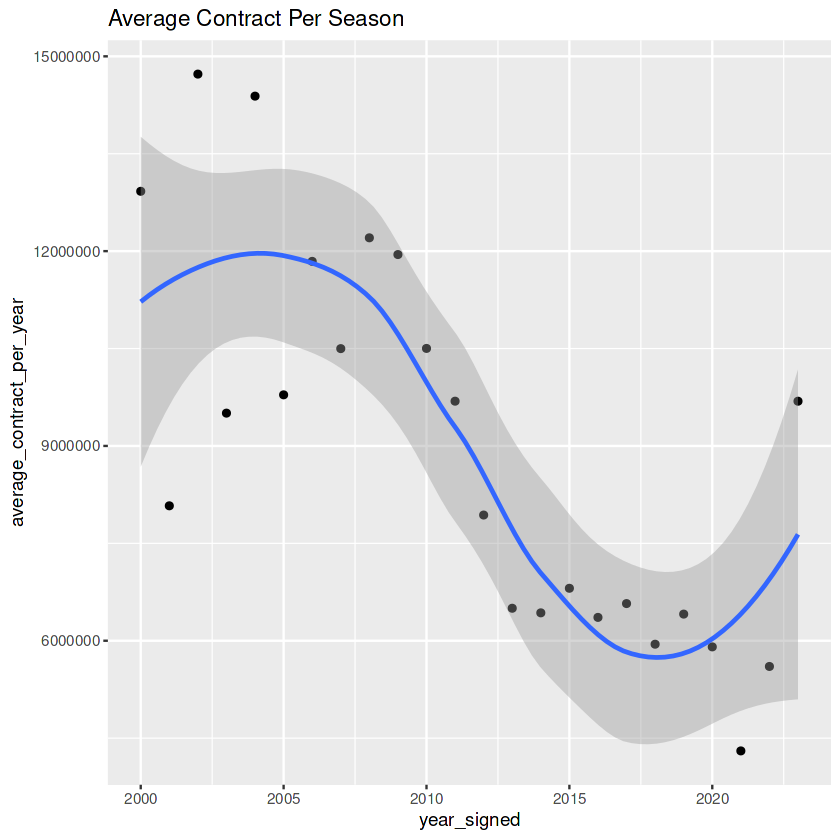

In [9]:
ggplot(data = contract_data, mapping = aes(x = year_signed, y = average_contract_per_year)) +
    geom_point() +
    geom_smooth() +
    labs(title = "Average Contract Per Season")

The following function visualizes the Average Salary Per Season and Position

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2017”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 4.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.1209”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y, object

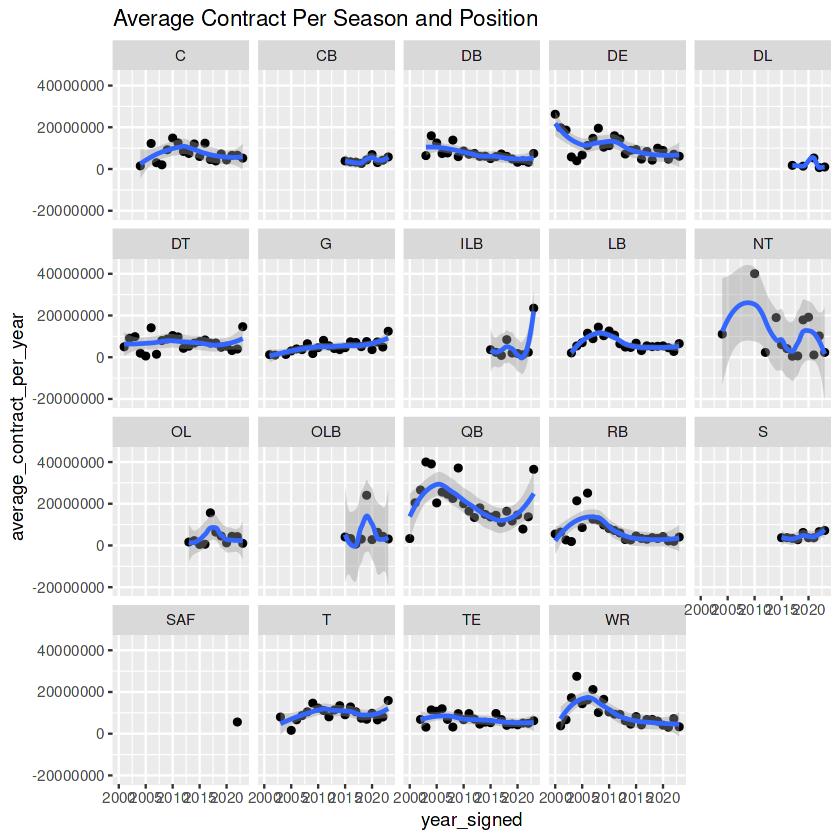

In [10]:
ggplot(data = position_contract, mapping = aes(x = year_signed, y = average_contract_per_year)) +
    geom_point() +
    geom_smooth() +
    facet_wrap(~position) +
    labs(title = "Average Contract Per Season and Position")

The following function visualizes the average total contract earned by a player per their round drafted.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


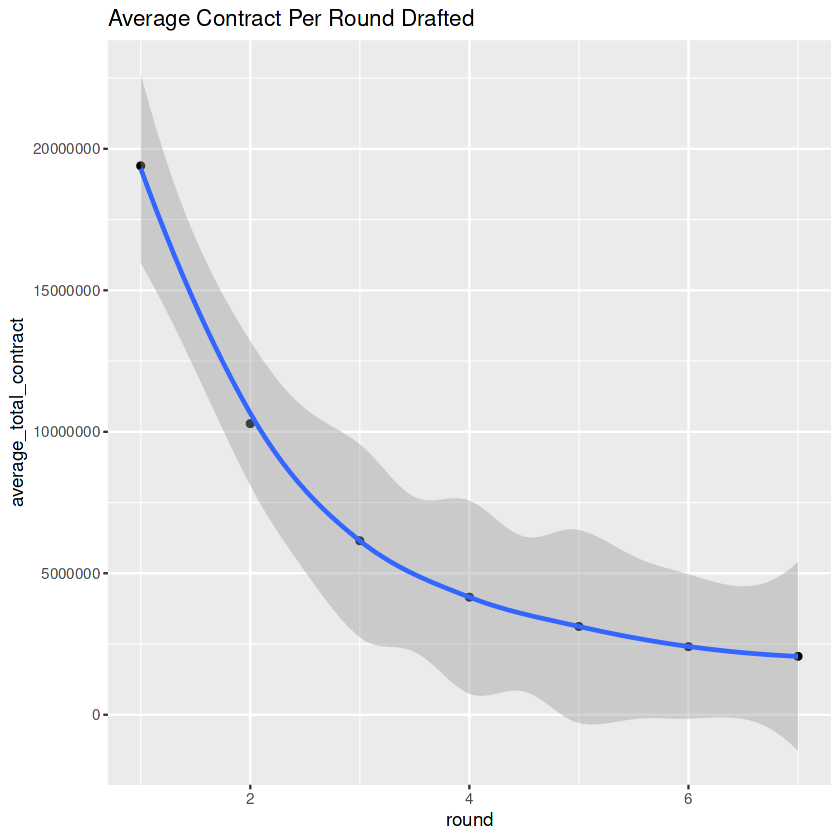

In [11]:
ggplot(data = draftround_contract, mapping = aes(x = round, y = average_total_contract)) +
    geom_point() +
    geom_smooth() +
    labs(title = "Average Contract Per Round Drafted")

## Summary

Given the analysis conducted, the following variables were compared:
* Average Contract Per Season
* Average Contract Per Season and Position
* Average Contract Per Round Drafted

With the results, the Average Contract Per Season has followed a non-linear trend, where average salaries have varied per season. It can be inferred that the increasing size of contracts for quarterbacks and wide receivers in recent seasons, and the decrease in size of contracts for other skilled positions, that positions that are not the quarterback or wide receiver are more often attaining larger sums in contract value relative to other positions. This skews the average salary per season figure significantly, leading to an assumption that players are getting paid less in recent years. However, this is not the case due to the top-end talent quarterbacks now earning contracts at minimum of 250 million, which is an average of 50 million per season on a 5-year term.

Additionally, the Average Contract Per Season and Position is an interesting figure. The reason being, contract values per season and position have remained ultimately flat for most positions. However, the position that varies the most by season is the quarterback position. As mentioned above, quarterback salaries have exponentially grown each season. There are outliers such as Patrick Mahomes of the Kansas City Chiefs signing a 500 million dollar contract, however, this only reveals the value a quarterback provides to a team and how it is reflected in contract value. The nose tackle position visualization reveals variance among seasons, while inside linebacker have been observed an increase in contract value in recent seasons. With all the data per position visualized, it must be emphasized that the quarterback position is one that observes the largest sums and changes in contract value

Lastly, the Average Contract Per Round Drafted was a comparison that displayed true correlation. This visualization revealed that players drafted in earlier rounds in the NFL draft undoubtedly earn higher valued contracts compared to players drafted in later rounds. Specifically, the disparity between players drafted in rounds 1-3 compared players drafted in round 4-6, is astronomical, revealing a variance of 26,153,370 when comparing rounds 1-3 vs rounds 4-6.

Overall, the results are evident that players on average are earning less per season due to allocations being made to the quarterback position. However, the average contract per season and position further established this disparity between quarterbacks and non-quarterback positions. Lastly, the notion that top-end talent being drafted in early rounds receiving higher-value contracts is asserted with the computations and visualization provided  

